In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df = pd.read_csv("/content/breast-cancer-wisconsin-data.csv")

print("\nDataset Information:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  peri

In [ ]:
print(df.head())
print(df.tail())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [ ]:
total_length = len(df)
print(f"Total number of rows in the dataset: {total_length}")

Total number of rows in the dataset: 569


In [ ]:
import seaborn as sns

# Check missing values
print(df.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [ ]:
print(df['diagnosis'].unique())
df['diagnosis'] = df['diagnosis'].str.strip()

df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})
print(df['diagnosis'].isnull().sum())


['M' 'B']
0


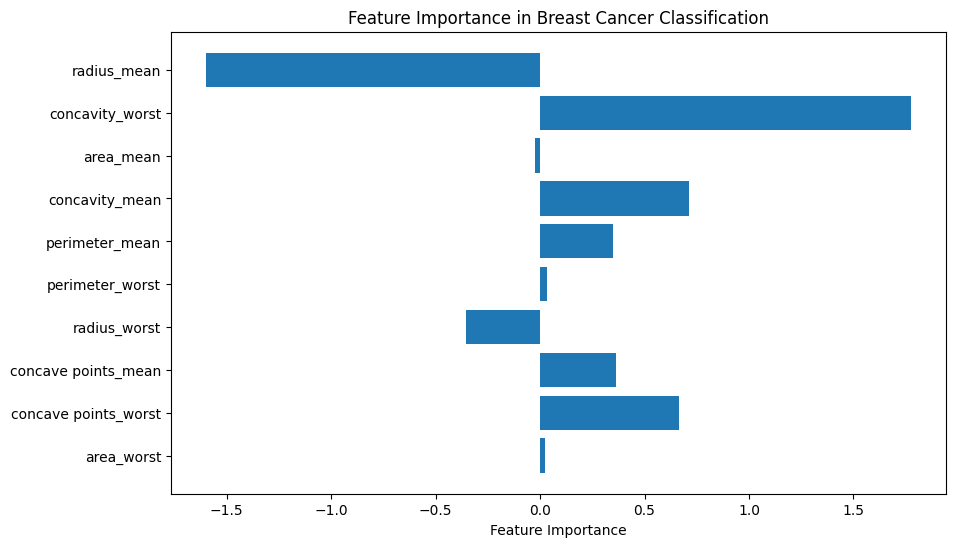

In [ ]:
import matplotlib.pyplot as plt

# Plot the importance of each feature
plt.figure(figsize=(10, 6))
importances = model.coef_[0]
features = X.columns
plt.barh(features, importances)

plt.xlabel('Feature Importance')
plt.title('Feature Importance in Breast Cancer Classification')
plt.show()

In [ ]:
#Selecting features
selected_features = [
    'area_worst', 'concave points_worst', 'concave points_mean', 'radius_worst',
    'perimeter_worst', 'perimeter_mean', 'concavity_mean', 'area_mean',
    'concavity_worst', 'radius_mean'
]
print (selected_features)

['area_worst', 'concave points_worst', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'perimeter_mean', 'concavity_mean', 'area_mean', 'concavity_worst', 'radius_mean']


In [ ]:
X = df[selected_features]  # Features
y = df['diagnosis']        # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 6: Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9912280701754386
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



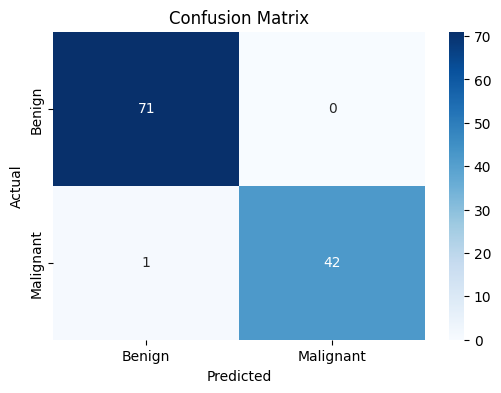

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



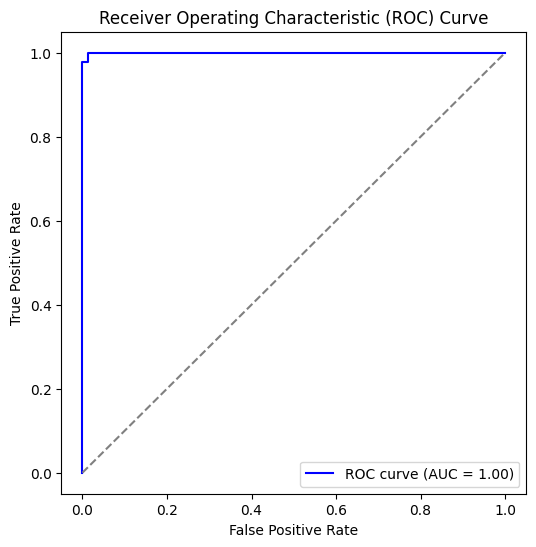

F1 Score: 0.99


In [ ]:
from sklearn.metrics import roc_curve, auc, f1_score

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# F1 Score
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")


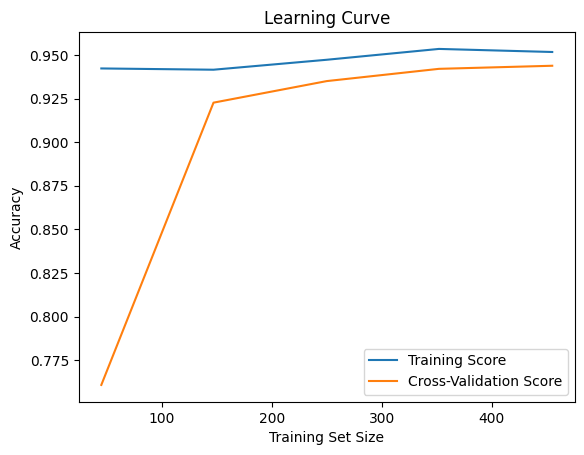

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, n_jobs=-1)
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Cross-Validation Score')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


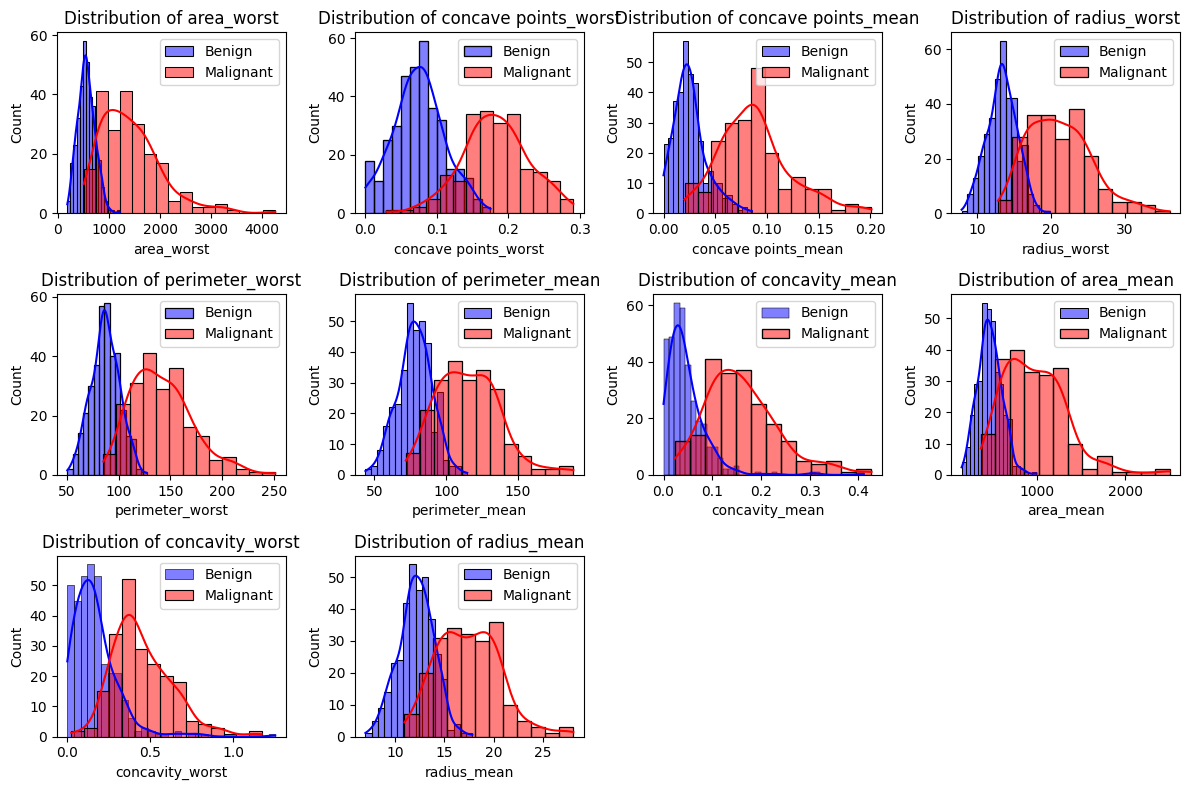

In [ ]:
plt.figure(figsize=(12, 8))
for feature in selected_features:
    plt.subplot(3, 4, selected_features.index(feature) + 1)
    sns.histplot(df[df['diagnosis'] == 0][feature], color='blue', kde=True, label='Benign')
    sns.histplot(df[df['diagnosis'] == 1][feature], color='red', kde=True, label='Malignant')
    plt.title(f'Distribution of {feature}')
    plt.legend()
plt.tight_layout()
plt.show()


<ipython-input-24-ab6667dd32b5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, palette='pastel')


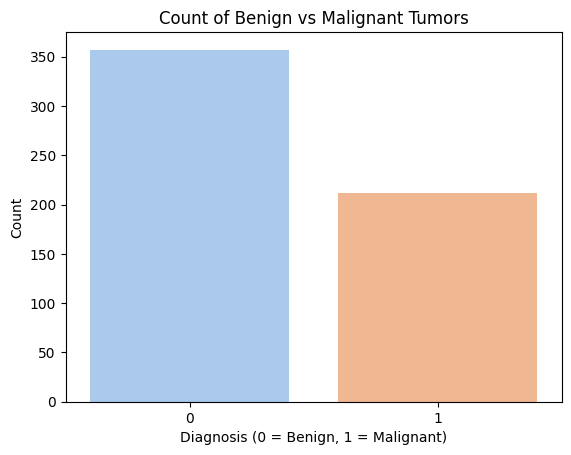

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot count of benign (0) and malignant (1) cases
sns.countplot(x='diagnosis', data=df, palette='pastel')
plt.title('Count of Benign vs Malignant Tumors')
plt.xlabel('Diagnosis (0 = Benign, 1 = Malignant)')
plt.ylabel('Count')
plt.show()
